# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와, 1개 이상의 독립 변수 X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
$$
\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b
\\
\hat{y_i} = \mathbf{w}^{T} \cdot \mathbf{X} 
$$

- $\hat{y_i}$: 예측값
- $x$: 특성(feature-컬럼)
- $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 절편
- $p$: p 번째 특성(feature)/p번째 가중치
- $i$: i번째 관측치(sample)


# G:
X: 기온, y:월드콘 판매량으로 설명    
X1-기온, X2: 광고 => 각 feature의 영향력=> 가중치 W1, W2    

ax + b : 선형관계=> 가설(통계)==>ML에선 알고리즘. a, b를 찾고 그것의 유의성 설명(통계), ML - 찾아서 예측하기.    

- 단순/다중 선형회귀 이야기도 한다.

## 손실(loss)함수/오차(error)함수/비용(cost)함수/목적(objective)함수

- 모델이 출력한 예측값과 실제 값 사이의 차이 계산하는 함수
- 평가 지표로 사용되기도 하고 모델을 최적화하는데 사용됨
- 회귀 문제의 대표적인 손실 함수: MSE

## 최적화(Optimize)

- 손실함수의 값이 최소화 되도록 모델을 학습하는 과정
- 최적화의 2가지 방법
    - 정규방정식: w, b값 찾는 함수
    - 경사하강법: 최적화 함수 없을 때 사용
        - w, b 찾기 위해 값 다 넣어보는 것. 오차가 더 이상 줄어들지 않을 때의 값을 최적의 값이라고 봄
        - 오차 적어지는 방향으로 w값 넣어줌
        - 미분 기울기 사용해 처리

### Boston DataSet
 - CRIM	: 지역별 범죄 발생률
 - ZN	: 25,000 평방피트를 초과하는 거주지역의 비율
 - INDUS: 비상업지역 토지의 비율
 - CHAS	: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
 - NOX	: 일산화질소 농도
 - RM	: 주택 1가구당 평균 방의 개수
 - AGE	: 1940년 이전에 건축된 소유주택의 비율
 - DIS	: 5개의 보스턴 고용센터까지의 접근성 지수
 - RAD	: 고속도로까지의 접근성 지수
 - TAX	: 10,000 달러 당 재산세율
 - PTRATIO : 지역별 교사 한명당 학생 비율
 - B	: 지역의 흑인 거주 비율
 - LSTAT: 하위계층의 비율(%)
 
 - MEDV	: Target.  본인 소유의 주택가격(중앙값) (단위: $1,000)


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target

In [3]:
df = pd.DataFrame(X, columns=boston.feature_names)
df['MEDV'] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [5]:
X.shape

(506, 13)

In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## 전처리
선형회귀 모델사용시 전처리
- 범주형: 원핫 인코딩
- Feature Scaling을 통해서 각 컬럼들의 값의 단위 맞춰줌
    - StandardScaler를 사용해 scaling하는 경우 성능이 더 잘 나오는 경향 있음

In [7]:
# 원핫인코딩
chas_df = pd.get_dummies(df['CHAS'])
chas_df.columns = ['CHAS_0', 'CHAS_1']
chas_df.head()

,CHAS_0,CHAS_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [8]:
df2 = df.join([chas_df])

In [9]:
df2 = df2.drop(columns='CHAS')

In [10]:
df2.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0


In [11]:
y = df2['MEDV']
X = df2.drop(columns='MEDV')
X.shape, y.shape

((506, 14), (506,))

In [12]:
np.random.seed(10)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
train_columns = X_train.columns

In [15]:
# 선형 회귀 모델은 scale 영향 많이 받음
# one hot encoding 한 뒤에 train/test 분리후 인코딩한다. (0,1 이 다른 값으로 바뀌지만 일관되게 바뀌어 모델에 영향을 주지 않는다.)
# 테스트 해보니 성능은 같게 나옴.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## LinearRegression
- 가장 기본적인 선형 회귀 모델

In [22]:
# 평가 지표 출력 함수
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
def print_metrics(y, y_pred, title=None):
    mse = np.round(mean_squared_error(y, y_pred), 3)
    rmse = np.round(np.sqrt(mse), 3)
    mae = np.round(mean_absolute_error(y, y_pred), 3)
    r2 = np.round(r2_score(y, y_pred), 3)
    if title:
        print(title)
    print(f"MSE:{mse}, RMSE:{rmse},MAE:{mae}, R2:{r2}")

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
X_train.shape

(404, 14)

In [15]:
lr.coef_.shape

(14,)

In [18]:
# 가중치(회귀계수)와 절편 조회
# CRIM - 음의 상관관계 => 집값 떨어뜨리는 요소
# ZN - 양의 상관관계 => 집값 올리는 요소
print('가중치')
lr.coef_ # 학습한 가중치

가중치


array([-1.16449629,  1.49915257, -0.05268964, -1.91400079,  2.08637507,
        0.45488752, -3.15772431,  2.71071007, -2.07814318, -1.7549281 ,
        1.08897073, -4.10237313, -0.24654802,  0.24654802])

In [19]:
train_columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS_0', 'CHAS_1'],
      dtype='object')

In [20]:
print('절편')
lr.intercept_

절편


21.84183168316832

In [26]:
# 예측
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

print_metrics(y_train, pred_train, title='LinearRegressor: Train')
print_metrics(y_test, pred_test, title="LinearRegressor: Test")


LinearRegressor: Train
MSE:19.231, RMSE:4.385,MAE:3.083, R2:0.75
LinearRegressor: Test
MSE:34.414, RMSE:5.866,MAE:4.061, R2:0.671


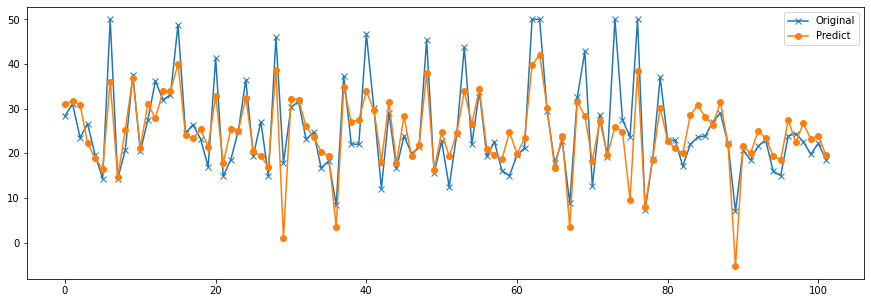

In [29]:
# 실제 값과 예측 가격을 plotting (Test Set 예측결과로)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test)), y_test, label='Original', marker='x')
plt.plot(range(len(pred_test)), pred_test, label='Predict', marker='o')
plt.legend()
plt.show()

## 다항회귀(Polynomial Regression)
- 단순한 직선형보다 복잡한 비선형의 데이터셋을 학습하기 위한 방식
- Feature들을 거듭제곱한 것과 Feature끼리 곱한 새로운 특성들을 추가한 뒤, 선형모델로 훈련시킴
    - y = w1x1 + w2x2 + w3x3 + b
    - x2 = x**2, x3 = x**3
- `PolynominalFeatures` Transformer를 사용

> 주의사항
> - degree 높게 할 경우, train에 대한 성능은 좋지만, test 성능 좋지 않은 과대적합 날 수 있음(선형 모델을 사용할 경우, 컬럼이 많은 일반 데이터의 경우에도 마찬가지)
> - 해결
    > - RamdomForest, DecisionTree의 get_features_importance()에서 관련 낮은 컬럼 삭제
    > - 규제 파라미터 통해 성능 높여주는 방법(릿지, 라쏘)

In [30]:
# 100ro 데이터 만들기
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# matplotlib 한글 걸정
mpl.rcParams['font.family'] = 'malgun gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [31]:
# X와 y 사이의 패턴 찾기. X 값들을 바탕으로 y값 예측
m = 100
# shape(100, 1). 0 ~ 1 실수
X = 6 * np.random.rand(m, 1) - 3
y = X ** 2 + X + 2 + np.random.normal(0, 1, size = (m, 1))  # np.random - noise 값
X.shape, y.shape

((100, 1), (100, 1))

In [32]:
X

array([[ 1.95366935],
       [ 1.0668978 ],
       [ 1.16565975],
       [-1.68492897],
       [ 2.40214437],
       [-2.21030276],
       [-2.24249258],
       [-2.08081842],
       [-0.93714063],
       [-2.94919853],
       [-2.20750844],
       [ 1.35325948],
       [ 1.97753409],
       [-2.91883091],
       [-2.59788912],
       [-2.32887092],
       [-1.22841119],
       [-2.19129645],
       [ 0.98910626],
       [-1.10045583],
       [-1.03776807],
       [-2.02765012],
       [-2.61559852],
       [ 1.44802141],
       [ 1.26451347],
       [-0.05108434],
       [ 2.15965317],
       [ 0.04577627],
       [ 0.45618054],
       [-1.47661518],
       [ 0.94172531],
       [ 0.91321975],
       [-2.61720163],
       [-2.78794349],
       [ 0.91007087],
       [-1.03610957],
       [ 2.48752968],
       [ 1.1209019 ],
       [ 0.62680831],
       [ 2.78931191],
       [ 2.03095057],
       [ 0.85786111],
       [-1.46835306],
       [-0.95452809],
       [-1.4955727 ],
       [-1

In [33]:
y

array([[ 9.41249697],
       [ 3.91923742],
       [ 2.14849407],
       [ 3.07954639],
       [10.48407292],
       [ 5.62114471],
       [ 5.68370943],
       [ 3.62033376],
       [ 0.27459563],
       [ 6.44405011],
       [ 4.04147437],
       [ 3.45725559],
       [ 7.96080173],
       [ 6.36762319],
       [ 6.71917648],
       [ 4.67226417],
       [ 1.61509081],
       [ 4.39802919],
       [ 4.12435809],
       [ 1.76669971],
       [ 2.4789326 ],
       [ 3.34298457],
       [ 6.66441617],
       [ 4.77374958],
       [ 4.71827119],
       [ 2.18427425],
       [10.0368142 ],
       [ 2.4159897 ],
       [ 4.27468825],
       [ 3.6912653 ],
       [ 3.70103813],
       [ 3.67470845],
       [ 6.87494498],
       [ 7.33859814],
       [ 3.9273592 ],
       [ 2.42930881],
       [10.41741582],
       [ 4.64784438],
       [ 3.22737055],
       [12.89048366],
       [ 7.57648263],
       [ 4.17325104],
       [ 3.11757898],
       [ 2.06558954],
       [ 4.21517728],
       [ 2

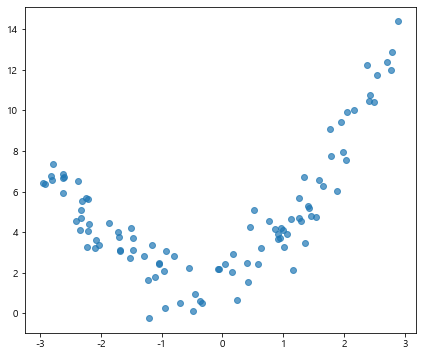

In [35]:
# 산점도 - X, y 사이 관계 보기
plt.figure(figsize = (7, 6))
plt.scatter(X, y, alpha = 0.7)
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
# 선형모델 그대로 학습, 예측
lr.fit(X, y)
lr.coef_, lr.intercept_

(array([[0.80688141]]), array([5.03010368]))

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
pred = lr.predict(X)
mean_squared_error(y, pred), r2_score(y, pred)

(7.521143122544466, 0.20594133771687428)

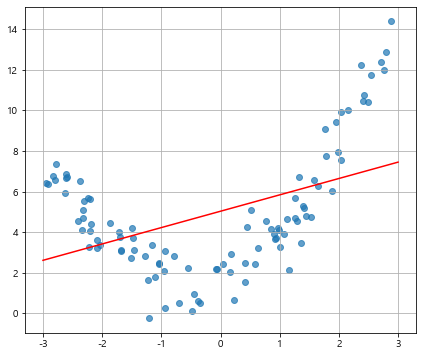

In [41]:
# 예측한 선형 모델을 위의 모델과 함께 그림
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
pred_new = lr.predict(X_new)

plt.figure(figsize = (7, 6))

plt.scatter(X, y, alpha = 0.7)
plt.plot(X_new, pred_new, color = 'red')

plt.grid(True)
plt.show()

In [43]:
# 2차 함수 형태 모델 만들기
#  X의 Feature를 늘려서 다향식 되도록 처리
from sklearn.preprocessing import PolynomialFeatures

In [53]:
# degree: 최고차항
# include_bias: 상수항 추가 여부(Default: True)
poly_f = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_f.fit_transform(X)

In [54]:
X.shape, X_poly.shape

((100, 1), (100, 2))

In [55]:
X[:5]

array([[ 1.95366935],
       [ 1.0668978 ],
       [ 1.16565975],
       [-1.68492897],
       [ 2.40214437]])

In [56]:
X_poly[:5]

array([[ 1.95366935,  3.81682394],
       [ 1.0668978 ,  1.13827092],
       [ 1.16565975,  1.35876265],
       [-1.68492897,  2.83898564],
       [ 2.40214437,  5.77029759]])

In [57]:
1.95366935 ** 2

3.8168239291294226

In [58]:
# 생성된 컬럼들이 어떻게 생성되었는지 확인 - 컬럼의 이름
poly_f.get_feature_names()

['x0', 'x0^2']

In [59]:
# 학습
lr2 = LinearRegression()
lr2.fit(X_poly, y)

lr2.coef_, lr2.intercept_

(array([[1.10699305, 1.03609309]]), array([1.94717129]))

In [61]:
# 예측
pred2 = lr2.predict(X_poly)

# 검증
mean_squared_error(y, pred2), r2_score(y, pred2)

# 다중회귀 사용하지 않았을 때마다 평가지표 올라감

(0.9050468274177637, 0.9044479992770291)

In [63]:
X_new_poly = poly_f.transform(X_new)
y_new2 = lr2.predict(X_new_poly)

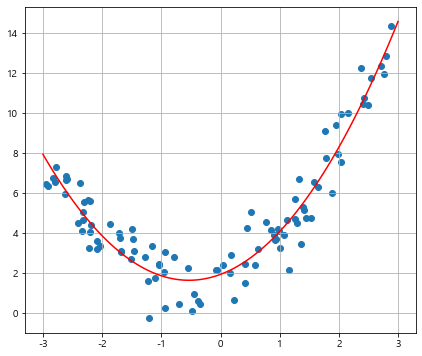

In [65]:
# 그래프
plt.figure(figsize = (7, 6))

plt.scatter(X, y)
plt.plot(X_new, y_new2, color = 'r')

plt.grid(True)
plt.show()

In [68]:
# 컬럼이 여러개일 경우, 처리 - 3개
data = np.arange(9).reshape(3,3)
data.shape
data

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [71]:
# 컬럼별 제곱, 컬럼별 교차곱까지
poly_f2 = PolynomialFeatures(degree = 2, include_bias = False)
data_poly = poly_f2.fit_transform(data)
data_poly.shape

(3, 9)

In [72]:
# 맨 앞에 상수항, 컬럼 그대로 3개, 제곱한 컬럼 3개, 교차곱
data_poly

array([[ 0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
       [ 3.,  4.,  5.,  9., 12., 15., 16., 20., 25.],
       [ 6.,  7.,  8., 36., 42., 48., 49., 56., 64.]])

In [73]:
poly_f2.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [84]:
# 다항회귀를 Boston Dataset에 적용
poly_f = PolynomialFeatures(degree = 2, include_bias = False)
X_train_scaled_poly = poly_f.fit_transform(X_train_scaled)
X_test_scaled_poly = poly_f.fit_transform(X_test_scaled)
X_train_scaled.shape, X_train_scaled_poly.shape

((404, 14), (404, 119))

In [85]:
lr = LinearRegression()
lr.fit(X_train_scaled_poly, y_train)

LinearRegression()

In [86]:
pred_train2 = lr.predict(X_train_scaled_poly)
pred_test2 = lr.predict(X_test_scaled_poly)

In [80]:
print('PolynomialFeature 적용 전 결과')
print_metrics(y_train, pred_train, title = 'Train')
print_metrics(y_test, pred_test, title = 'Test')

PolynomialFeature 적용 전 결과
Train
MSE:19.231, RMSE:4.385,MAE:3.083, R2:0.75
Test
MSE:34.414, RMSE:5.866,MAE:4.061, R2:0.671


In [87]:
print('PolynomialFeature 적용 후 결과-degree-2')
print_metrics(y_train, pred_train2, title = "Title")
print_metrics(y_test, pred_test2, title = 'Test')

PolynomialFeature 적용 후 결과-degree-2
Title
MSE:5.239, RMSE:2.289,MAE:1.673, R2:0.932
Test
MSE:13.073, RMSE:3.616,MAE:2.818, R2:0.875


In [83]:
print('PolynomialFeature 적용 후 결과-degree-5')
print_metrics(y_train, pred_train2, title = "Title")
print_metrics(y_test, pred_test2, title = 'Test')

PolynomialFeature 적용 후 결과-degree-5
Title
MSE:0.0, RMSE:0.0,MAE:0.0, R2:1.0
Test
MSE:1553.112, RMSE:39.41,MAE:14.177, R2:-13.851


# Guide
- l1: 라쏘, l2: 릿지

## 규제 (Regularization)
- 선형회귀모델의 과적합 해결하기 위해 가중치(회귀계수)에 패널티 값 적용하는 것
    - 가중치(w1, w2, w3..)의 값 줄여주는 것
- 입력데이터의 Feature들이 너무 많은 경우 과적합 발생
    - Feature수에 비해 관측치 수가 적은 경우, 모델이 복잡해지며 과적합 발생
- 해결
    - 데이터 추가 수집 
    - Feature selection
        - 불필요한 Features들을 제거
    - 규제(Regularization) 통해 Feature들에 곱해지는 가중치 커지지 않도록 제한

## Ridge Regression
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm) 더해줌
    - 규제항? 특정한 값 더해줌. MSE(오차)에다가 특정 값을 더해 오차를 키움
    - 가중치 값이 떨어지면서 과적합 어느 정도 해결
    - 가중치 값을 제곱해 더한 값을 규제항으로 사용
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절 
- 가중치 제곱한 값의 합을 얼마만큼 더해줄지 결정하는 하이퍼 파라미터
    - $\alpha = 0$에 가까울수록 규제 약해짐(0일 경우 선형회귀와 동일)
    - $\alpha$ 가 커질수록(오차 커질수록) 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 output에 대한 영향력 작아지게 됨

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

In [91]:
from sklearn.linear_model import Ridge

ridge_1 = Ridge(alpha = 1) #alpha : 기본값 - 1
# ridge_1 = Ridge(alpha=25) -> 가중치 작아짐 -> 규제 강도 높이는 것
ridge_1.fit(X_train_scaled, y_train)

pred_train = ridge_1.predict(X_train_scaled)
pred_test = ridge_1.predict(X_test_scaled)

In [89]:
print_metrics(y_train, pred_train, title='Ridge alpha 1: Train')
print_metrics(y_test, pred_test, title="Ridge alpha 1: Test")

Ridge alpha 1: Train
MSE:19.233, RMSE:4.386,MAE:3.079, R2:0.75
Ridge alpha 1: Test
MSE:34.392, RMSE:5.864,MAE:4.058, R2:0.671


In [92]:
# 하이퍼파라미터 알파 = 25로 했을 때 
print_metrics(y_train, pred_train, title='Ridge alpha 25: Train')
print_metrics(y_test, pred_test, title="Ridge alpha 25: Test")

Ridge alpha 25: Train
MSE:19.679, RMSE:4.436,MAE:3.038, R2:0.744
Ridge alpha 25: Test
MSE:34.397, RMSE:5.865,MAE:4.029, R2:0.671


## GridSearchCV 

In [93]:
from sklearn.model_selection import GridSearchCV
param = {'alpha':[0.01, 0.1,0.5,1,10,20,30,40,50,100]}
ridge = Ridge()
gs = GridSearchCV(ridge, param_grid = param, cv = 5, n_jobs=-1, scoring=['r2','neg_mean_squared_error'], refit='r2')

In [94]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10, 20, 30, 40, 50, 100]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'])

In [95]:
import pandas as pd
cv_result = pd.DataFrame(gs.cv_results_).sort_values('rank_test_neg_mean_squared_error')
cv_result.filter(like='mean_test').join(cv_result.filter(like='param'))

,mean_test_r2,mean_test_neg_mean_squared_error,param_alpha,params
3,0.718794,-21.376445,1,{'alpha': 1}
2,0.718655,-21.385044,0.5,{'alpha': 0.5}
1,0.718526,-21.393176,0.1,{'alpha': 0.1}
4,0.718805,-21.394979,10,{'alpha': 10}
0,0.718495,-21.395170,0.01,{'alpha': 0.01}
5,0.716538,-21.573478,20,{'alpha': 20}
6,0.713520,-21.804009,30,{'alpha': 30}
7,0.710194,-22.056093,40,{'alpha': 40}
8,0.706720,-22.318945,50,{'alpha': 50}
9,0.688732,-23.681505,100,{'alpha': 100}


In [97]:
!pip install xgboost

In [102]:
# Guide
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
g = GradientBoostingRegressor(n_estimators=100, max_depth=3)
# g = XGBRegressor(n_estimators=300, max_depth=2)
g.fit(X_train_scaled, y_train)
print(mean_squared_error(y_train, g.predict(X_train_scaled)))
print(mean_squared_error(y_test, g.predict(X_test_scaled)))

1.6700633087575334
12.451707444297819


In [103]:
pd.Series(g.feature_importances_, index=X_train.columns).sort_values(ascending=False)

LSTAT      0.455513
RM         0.348527
DIS        0.075537
NOX        0.035195
PTRATIO    0.027419
CRIM       0.023388
TAX        0.013547
B          0.010483
AGE        0.005624
RAD        0.001988
INDUS      0.001393
CHAS_0     0.001076
CHAS_1     0.000193
ZN         0.000119
dtype: float64

## 규제 alpha 에 따른 weight 변화

	**Ridge alpha 0: Train**
MSE:19.309, RMSE:4.394,MAE:3.087, R2:0.749
	**Ridge alpha  0: Test**
MSE:34.77, RMSE:5.897,MAE:4.073, R2:0.668
--------------------------------------------------
	**Ridge alpha 0.1: Train**
MSE:19.231, RMSE:4.385,MAE:3.083, R2:0.75
	**Ridge alpha  0.1: Test**
MSE:34.412, RMSE:5.866,MAE:4.061, R2:0.671
--------------------------------------------------
	**Ridge alpha 1: Train**
MSE:19.233, RMSE:4.386,MAE:3.079, R2:0.75
	**Ridge alpha  1: Test**
MSE:34.392, RMSE:5.864,MAE:4.058, R2:0.671
--------------------------------------------------
	**Ridge alpha 10: Train**
MSE:19.344, RMSE:4.398,MAE:3.051, R2:0.749
	**Ridge alpha  10: Test**
MSE:34.304, RMSE:5.857,MAE:4.037, R2:0.672
--------------------------------------------------
	**Ridge alpha 100: Train**
MSE:21.586, RMSE:4.646,MAE:3.109, R2:0.72
	**Ridge alpha  100: Test**
MSE:36.307, RMSE:6.026,MAE:4.153, R2:0.653
--------------------------------------------------
	**Ridge alpha 200: Train**
MSE:23.931, RMSE:4.89

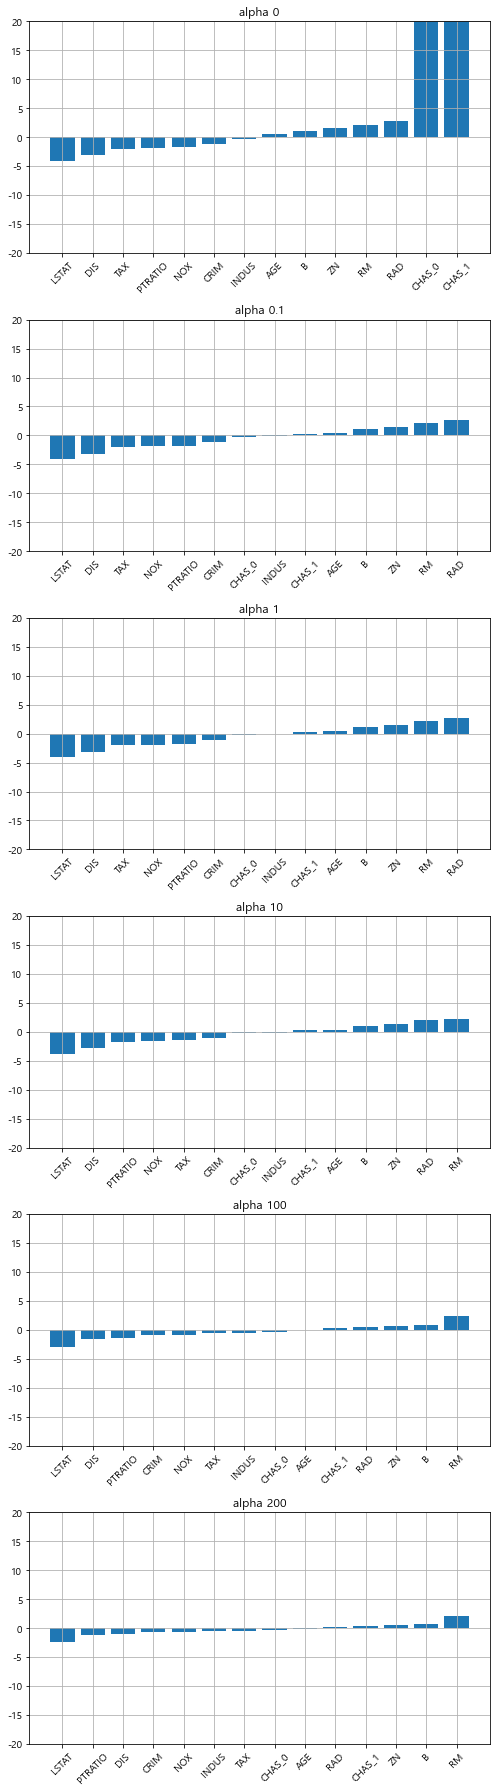

In [106]:
import matplotlib.pyplot as plt
np.random.seed(1)
alpha_list = [0, 0.1, 1, 10, 100,200]
coef_df = pd.DataFrame()

plt.figure(figsize=(7,25))
for idx, alpha in enumerate(alpha_list, start=1):
#     print(alpha)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    
    pred_train = ridge.predict(X_train_scaled)
    pred_test = ridge.predict(X_test_scaled)

    print_metrics(y_train, pred_train, title=f'\t**Ridge alpha {alpha}: Train**')
    print_metrics(y_test, pred_test, title=f"\t**Ridge alpha  {alpha}: Test**")
    print("-"*50)
    w = pd.Series(np.round(ridge.coef_,3), index=X_train.columns).sort_values()
    coef_df[f'alpha {alpha}'] = w
    plt.subplot(6,1,idx)
    
    plt.bar(x=w.index, height=w)
    plt.xticks(rotation=45)
    plt.ylim(-20, 20) # y를 고정해야 변화가 잘 보인다.
    plt.title(f"alpha {alpha}")
    plt.grid(True)


plt.tight_layout() #간격 자동조절
plt.show()

In [107]:
coef_df

,alpha 0,alpha 0.1,alpha 1,alpha 10,alpha 100,alpha 200
LSTAT,-4.021000e+00,-4.100,-4.082,-3.915,-2.956,-2.428
DIS,-3.042000e+00,-3.154,-3.122,-2.832,-1.475,-0.933
TAX,-2.030000e+00,-2.070,-1.999,-1.489,-0.543,-0.455
PTRATIO,-1.867000e+00,-1.754,-1.746,-1.681,-1.389,-1.223
NOX,-1.687000e+00,-1.911,-1.881,-1.631,-0.776,-0.573
CRIM,-1.218000e+00,-1.163,-1.153,-1.071,-0.779,-0.671
INDUS,-2.270000e-01,-0.055,-0.076,-0.218,-0.464,-0.499
AGE,5.080000e-01,0.454,0.441,0.341,-0.031,-0.154
B,1.127000e+00,1.089,1.088,1.078,0.935,0.802
ZN,1.579000e+00,1.497,1.477,1.318,0.778,0.633


## Lasso(Least Absolute Shrinkage and Selection Operator) Regression

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm) 더함
    - 규제항? w1, w2, w3등 가중치 절대값의 합
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 됨
    - Ridge와의 차이? Ridge는 가중치를 0으로 만들지는 않음
- 가중치에 절대값 씌운 값의 합을 얼마만큼 더해줄지 결정하는 하이퍼 파라미터
    - $\alpha = 0$에 가까울수록 규제 약해짐(0일 경우 선형회귀와 동일)
    - $\alpha$ 가 커질수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 output에 대한 영향력 작아지게 됨


$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

In [108]:
from sklearn.linear_model import Lasso

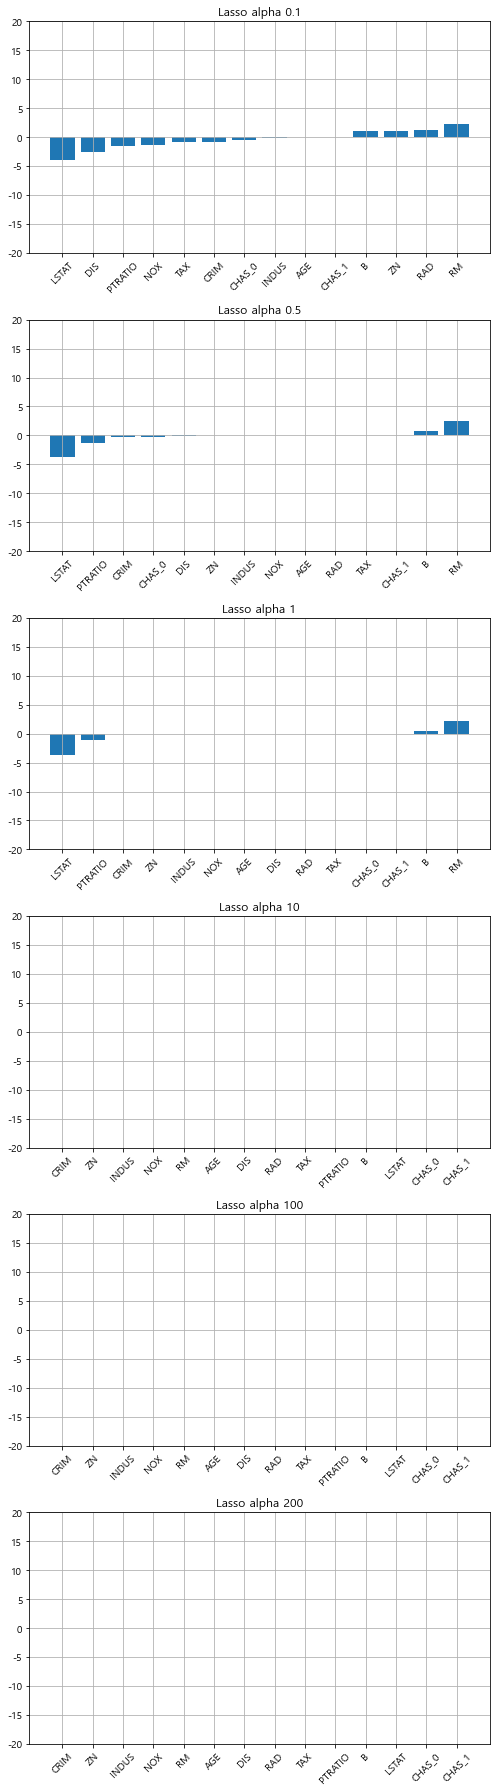

In [112]:
import matplotlib.pyplot as plt
alpha_list = [0.1, 0.5, 1, 10, 100, 200]

lasso_coef_df = pd.DataFrame()

plt.figure(figsize=(7,25))
for idx, alpha in enumerate(alpha_list, start=1):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    
    w = pd.Series(lasso.coef_, index=X_train.columns).sort_values()
    lasso_coef_df[f'alpha {alpha}'] = w
    plt.subplot(6,1,idx)
    
    plt.bar(x=w.index, height=w)
    plt.xticks(rotation=45)
    plt.ylim(-20, 20)
    plt.title(f"Lasso alpha {alpha}")
    plt.grid(True)
    
plt.tight_layout() #간격 자동조절
plt.show()    

In [113]:
lasso_coef_df

,alpha 0.1,alpha 0.5,alpha 1,alpha 10,alpha 100,alpha 200
LSTAT,-3.953760e+00,-3.786105,-3.716066,-0.0,-0.0,-0.0
DIS,-2.583343e+00,-0.146112,-0.000000,0.0,0.0,0.0
PTRATIO,-1.586031e+00,-1.381795,-1.134171,-0.0,-0.0,-0.0
NOX,-1.285815e+00,-0.000000,-0.000000,-0.0,-0.0,-0.0
TAX,-8.893142e-01,-0.000000,-0.000000,-0.0,-0.0,-0.0
CRIM,-8.702606e-01,-0.273581,-0.012648,-0.0,-0.0,-0.0
CHAS_0,-4.815937e-01,-0.227676,-0.000000,-0.0,-0.0,-0.0
INDUS,-1.218122e-01,-0.000000,-0.000000,-0.0,-0.0,-0.0
AGE,0.000000e+00,0.000000,-0.000000,-0.0,-0.0,-0.0
CHAS_1,7.035077e-17,0.000000,0.000000,0.0,0.0,0.0


## 엘라스틱넷
- 릿지와 라쏘 절충한 모델
- 규제항에 릿지, 라쏘 규제항 더해서 추가 
- 혼합비율 $r$을 사용해 혼합정도 조절
    - r: 릿지, 라쏘 규제항의 비율 정해줌
- $r=0$이면 릿지와 같고 $r=1$이면 라쏘와 같음

$$
\text{손실함수}(w) = \text{MSE}(w) + r\alpha \sum_{i=1}^{n}{\left| w_i \right|}  + \cfrac{1-r}{2}\alpha\sum_{i=1}^{n}{w_{i}^{2}}
$$

In [115]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.6) #alpha 패널티, l1_ratio: 비율(라쏘쪽. 위의것으로 보면 앞의것의 r 지정.)
elastic.fit(X_train_scaled, y_train)

pred_train = elastic.predict(X_train_scaled)
pred_test = elastic.predict(X_test_scaled)

print_metrics(y_train, pred_train, title='ElasticNet alpha 0.1: Train')
print_metrics(y_test, pred_test, title="ElasticNet alpha 0.1: Test")

ElasticNet alpha 0.1: Train
MSE:19.854, RMSE:4.456,MAE:3.039, R2:0.742
ElasticNet alpha 0.1: Test
MSE:34.342, RMSE:5.86,MAE:4.025, R2:0.672


# 정리
- 일반적으로 선형회귀의 경우, 어느정도 규제가 있는 경우가 성능 좋음
- 기본적으로 릿지 사용
- Target에 영향 주는 Feature가 몇 개뿐일 경우, 특성 가중치를 0으로 만들어 주는 라쏘 사용
- 특성 수가 학습 샘플 수 보다 많거나 feature간에 연관성이 높을 때는 엘라스틱넷 사용
    - 데이터 양보다 컬럼 개수가 더 많은 특수한 경우